## UTMCC DataViz Module 20 Final Team Project
### Food Deserts in the Austin, Texas Metro Area

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
from scipy import stats
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt
import calendar
import random

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import statistics
from flask import Flask, jsonify
from mpl_toolkits.mplot3d import Axes3D

# Python SQL toolkit and Object Relational Mapper
import sqlite3
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [3]:
# Import and read csv files
food_atlas_df = pd.read_csv("resources/food_access_research_atlas.csv")
# food_var_df = pd.read_csv("resources/food_access_variable_lookup.csv")

In [4]:
food_atlas_df.head()

CensusTract    State   County  Urban  POP2010  OHU2010  GroupQuartersFlag  \
0   1001020100  Alabama  Autauga      1     1912      693                  0   
1   1001020200  Alabama  Autauga      1     2170      743                  0   
2   1001020300  Alabama  Autauga      1     3373     1256                  0   
3   1001020400  Alabama  Autauga      1     4386     1722                  0   
4   1001020500  Alabama  Autauga      1    10766     4082                  0   

   NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  TractSeniors  TractWhite  \
0         0  0.000000                  0  ...           221        1622   
1       181  0.083410                  0  ...           214         888   
2         0  0.000000                  0  ...           439        2576   
3         0  0.000000                  0  ...           904        4086   
4       181  0.016812                  0  ...          1126        8666   

   TractBlack  TractAsian  TractNHOPI  TractAIAN  TractOMultir  TractHispanic  \
0         217          14           0         14            45             44   
1        1217           5           0          5            55             75   
2         647          17           5         11           117             87   
3         193          18           4         11            74             85   
4        1437         296           9         48           310            355   

   TractHUNV  TractSNAP  
0         26        112  
1         87        202  
2        108        120  
3         19         82  
4        198        488  

[5 rows x 147 columns]

In [ ]:
# food_var_df.head()

## Preprocessing the data

In [5]:
food_atlas_df.dtypes

CensusTract       int64
State            object
County           object
Urban             int64
POP2010           int64
                  ...  
TractAIAN         int64
TractOMultir      int64
TractHispanic     int64
TractHUNV         int64
TractSNAP         int64
Length: 147, dtype: object

In [6]:
# Create new df keeping only Texas
food_texas_df = food_atlas_df[(food_atlas_df["State"]=="Texas")]
food_texas_df

CensusTract  State    County  Urban  POP2010  OHU2010  \
61468  48001950100  Texas  Anderson      0     4685     1874   
61469  48001950401  Texas  Anderson      0     5422       77   
61470  48001950402  Texas  Anderson      0     7535       83   
61471  48001950500  Texas  Anderson      1     4377     1604   
61472  48001950600  Texas  Anderson      1     6405     2253   
...            ...    ...       ...    ...      ...      ...   
66721  48505950400  Texas    Zapata      0     5610     1741   
66722  48507950100  Texas    Zavala      0     1232      388   
66723  48507950200  Texas    Zavala      0     1880      590   
66724  48507950301  Texas    Zavala      0     2254      628   
66725  48507950302  Texas    Zavala      1     6311     1967   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
61468                  0        49  0.010459                  0  ...   
61469                  1      5219  0.962560                  0  ...   
61470                  1      7315  0.970803                  0  ...   
61471                  0        86  0.019648                  1  ...   
61472                  0        96  0.014988                  1  ...   
...                  ...       ...       ...                ...  ...   
66721                  0         0  0.000000                  1  ...   
66722                  0         0  0.000000                  1  ...   
66723                  0         0  0.000000                  1  ...   
66724                  0       348  0.154392                  0  ...   
66725                  0        61  0.009666                  1  ...   

       TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  \
61468           912        4012         452          22           0   
61469            24        1825        2266          21           0   
61470           134        2591        3248          13           0   
61471           627        2737         800          19           2   
61472           791        3831        1674          68           4   
...             ...         ...         ...         ...         ...   
66721           555        5264           5          12           0   
66722           125        1056           4           0           0   
66723           203        1612          21           2           9   
66724           225        2096          14           1           0   
66725           855        5537          50           1           7   

       TractAIAN  TractOMultir  TractHispanic  TractHUNV  TractSNAP  
61468         13           186            236        125        218  
61469          5          1305           1324          5          0  
61470         10          1673           1737          0          0  
61471         20           799           1389         66        288  
61472         43           785           1253        194        412  
...          ...           ...            ...        ...        ...  
66721         30           299           5176         58        539  
66722          2           170           1104         55        164  
66723         13           223           1635         59        155  
66724          3           140           2109        160        384  
66725         23           693           6113        310        616  

[5258 rows x 147 columns]

In [7]:
# Create new df keeping only select Counties in the Austin Metro Area
counties = ["Austin", "Bastrop", "Caldwell", "Hays", "Travis", "Williamson"]
food_austin_df = food_texas_df.loc[food_texas_df["County"].isin(counties)]
food_austin_df.head(10)

CensusTract  State   County  Urban  POP2010  OHU2010  \
61517  48015760100  Texas   Austin      0     2400      910   
61518  48015760200  Texas   Austin      0     6032     2121   
61519  48015760300  Texas   Austin      0     7037     2604   
61520  48015760400  Texas   Austin      0     3660     1501   
61521  48015760501  Texas   Austin      0     4184     1658   
61522  48015760502  Texas   Austin      0     5104     2043   
61529  48021950100  Texas  Bastrop      0     8608     3063   
61530  48021950200  Texas  Bastrop      1     7955     2625   
61531  48021950300  Texas  Bastrop      0    12927     4734   
61532  48021950400  Texas  Bastrop      1     7984     3127   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
61517                  0         0  0.000000                  0  ...   
61518                  0         0  0.000000                  0  ...   
61519                  0        55  0.007816                  0  ...   
61520                  0        26  0.007104                  0  ...   
61521                  0       118  0.028203                  0  ...   
61522                  0        13  0.002547                  0  ...   
61529                  0         0  0.000000                  0  ...   
61530                  0       186  0.023381                  1  ...   
61531                  0        71  0.005492                  0  ...   
61532                  0       456  0.057114                  0  ...   

       TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  \
61517           320        1718         310           8           0   
61518           724        4479         759          30           0   
61519           997        5495         484          43           0   
61520           734        3290         180           1           0   
61521           845        3641         273           5           0   
61522           804        3756         662          31           1   
61529          1028        6507         383          53           4   
61530           891        4521        1328          32          14   
61531          1468        9971        1213         156          18   
61532          1199        6312         800          78           3   

       TractAIAN  TractOMultir  TractHispanic  TractHUNV  TractSNAP  
61517         13           351            647         43         95  
61518         15           749           2037         36        238  
61519         23           992           1964         79        185  
61520         15           174            378         31         81  
61521         19           246            450         62         61  
61522         53           601           1165        221        293  
61529         65          1596           2660         51        351  
61530         76          1984           3674        148        444  
61531         88          1481           3012         95        568  
61532         62           729           1711        255        261  

[10 rows x 147 columns]

In [8]:
# Create new df with select feature columns
food_desert_df = food_austin_df[["LILATracts_1And10", "lasnaphalf", "lasnaphalfshare", "lahunvhalf", "lahunvhalfshare", "lasnap1", "lasnap1share", "lahunv1", "lahunv1share", "lasnap10", "lasnap10share", "lahunv10", "lahunv10share", "lasnap20", "lasnap20share",  "lahunv20", "lahunv20share"]]
food_desert_df

LILATracts_1And10  lasnaphalf  lasnaphalfshare  lahunvhalf  \
61517                  0   94.069641         0.103373   42.301894   
61518                  0  203.757734         0.096067   36.780873   
61519                  0  157.679884         0.060553   66.044978   
61520                  0   87.279971         0.058148   32.229272   
61521                  0   57.859268         0.034897   56.105956   
...                  ...         ...              ...         ...   
66673                  0  253.269297         0.076911  147.346423   
66674                  0   65.461476         0.027253    3.168106   
66675                  1   24.931507         0.022260    6.618853   
66676                  0  104.153688         0.108607   13.420352   
66677                  1   32.568093         0.060311   15.626323   

       lahunvhalfshare     lasnap1  lasnap1share    lahunv1  lahunv1share  \
61517         0.046486   94.069641      0.103373  42.301894      0.046486   
61518         0.017341  151.844853      0.071591  35.731296      0.016846   
61519         0.025363   98.379266      0.037780  43.247997      0.016608   
61520         0.021472   87.279971      0.058148  32.229272      0.021472   
61521         0.033840   50.198181      0.030276  31.806270      0.019184   
...                ...         ...           ...        ...           ...   
66673         0.044745  200.157469      0.060783  94.092539      0.028574   
66674         0.001319   37.486129      0.015606   0.346386      0.000144   
66675         0.005910   24.931507      0.022260   6.618853      0.005910   
66676         0.013994  104.153688      0.108607  13.420352      0.013994   
66677         0.028938   32.568093      0.060311  15.626323      0.028938   

        lasnap10  lasnap10share   lahunv10  lahunv10share  lasnap20  \
61517   0.000000       0.000000   0.000000       0.000000       0.0   
61518   0.000000       0.000000   0.000000       0.000000       0.0   
61519   1.410813       0.000542   0.967484       0.000372       0.0   
61520  53.090398       0.035370  22.079802       0.014710       0.0   
61521   0.000000       0.000000   0.000000       0.000000       0.0   
...          ...            ...        ...            ...       ...   
66673   0.000000       0.000000   0.000000       0.000000       0.0   
66674   0.000000       0.000000   0.000000       0.000000       0.0   
66675  15.243361       0.013610   2.243933       0.002004       0.0   
66676   0.000000       0.000000   0.000000       0.000000       0.0   
66677  11.559745       0.021407   3.761015       0.006965       0.0   

       lasnap20share  lahunv20  lahunv20share  
61517            0.0       0.0            0.0  
61518            0.0       0.0            0.0  
61519            0.0       0.0            0.0  
61520            0.0       0.0            0.0  
61521            0.0       0.0            0.0  
...              ...       ...            ...  
66673            0.0       0.0            0.0  
66674            0.0       0.0            0.0  
66675            0.0       0.0            0.0  
66676            0.0       0.0            0.0  
66677            0.0       0.0            0.0  

[356 rows x 17 columns]

In [ ]:
# print(food_desert_df)

## SQLite database

In [9]:
# SQLAlchemy Create Engine, to access and query the SQLite database file
engine = create_engine("sqlite:///food_desert.sqlite", echo=True)
sqlite_connection = engine.connect()

2020-12-18 15:46:19,780 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-18 15:46:19,782 INFO sqlalchemy.engine.base.Engine ()
2020-12-18 15:46:19,785 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-18 15:46:19,786 INFO sqlalchemy.engine.base.Engine ()


In [ ]:
# to reflect the database into a new model
#Base = automap_base()
# to reflect the db tables 
#Base.prepare(engine, reflect=True)

In [ ]:
#sqlite_table = "Food20"
#food_desert_df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

In [ ]:
#sqlite_table

In [ ]:
# Close the database connection
#sqlite_connection.close()

### Create the database

In [10]:
# Create the database
conn = sqlite3.connect("DB1.sqlite")
cur = conn.cursor()

In [13]:
cur.execute('CREATE TABLE Food_desert2 (LILATracts_1And10, lasnaphalf, lasnaphalfshare, lahunvhalf, lahunvhalfshare, lasnap1, lasnap1share, lahunv1, lahunv1share, lasnap10, lasnap10share, lahunv10, lahunv10share, lasnap20, lasnap20share,  lahunv20, lahunv20share)')
conn.commit()

In [ ]:
# df = pd.read_sql_query("SELECT * FROM Food_desert1", conn)

In [14]:
# Data from dataframe to SQLite
food_desert_df.to_sql('Food_desert2', conn, if_exists='replace', index=False)

In [15]:
cur.execute('''SELECT * FROM Food_desert2''')

In [16]:
for row in cur.fetchall():
    print(row)

436922, 28.38470734, 0.015955429, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(0, 407.985439, 0.16100451400000002, 71.47292251, 0.028205572999999998, 309.78591769999997, 0.12225174300000001, 45.34625835, 0.01789513, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(0, 181.1416499, 0.17970401800000002, 40.85235937, 0.040528134, 181.1416499, 0.17970401800000002, 40.85235937, 0.040528134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(1, 99.7986824, 0.15716327900000002, 36.29042998, 0.057150282999999996, 51.13555972, 0.08052844099999999, 18.59474883, 0.029283069, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(0, 13.5273943, 0.081002361, 9.662424501, 0.057858829, 13.51162794, 0.080907952, 9.65116282, 0.057791394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(0, 27.27783585, 0.022469387, 16.0466177, 0.013217972, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(1, 436.2985183, 0.177573675, 255.07144449999998, 0.10381418199999999, 48.538971000000004, 0.019755381000000002, 1.7798392769999998, 0.000724395, 0.0, 

In [17]:
# From SQLite to DataFrame
food_desert2_df = DataFrame(cur.fetchall(), columns=['LILATracts_1And10', 'lasnaphalf', 'lasnaphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnap1', 'lasnap1share', 'lahunv1', 'lahunv1share', 'lasnap10', 'lasnap10share', 'lahunv10', 'lahunv10share', 'lasnap20', 'lasnap20share',  'lahunv20', 'lahunv20share'])
print(food_desert2_df)

Empty DataFrame
Columns: [LILATracts_1And10, lasnaphalf, lasnaphalfshare, lahunvhalf, lahunvhalfshare, lasnap1, lasnap1share, lahunv1, lahunv1share, lasnap10, lasnap10share, lahunv10, lahunv10share, lasnap20, lasnap20share, lahunv20, lahunv20share]
Index: []


In [18]:
food_desert2_df

Empty DataFrame
Columns: [LILATracts_1And10, lasnaphalf, lasnaphalfshare, lahunvhalf, lahunvhalfshare, lasnap1, lasnap1share, lahunv1, lahunv1share, lasnap10, lasnap10share, lahunv10, lahunv10share, lasnap20, lasnap20share, lahunv20, lahunv20share]
Index: []

In [ ]:
# Save references to each table, create a variable for each of the classes to reference them later
# Food20 = Base.classes.Food20


In [19]:
#Base.classes.keys()
# Create our session (link) from Python to the DB
session = Session(engine)

In [21]:
# Query that filters the  table to retrieve the . 
results = session.query(food_desert2_df.LILATracts_1And10).all()
print(results)

InvalidRequestError: SQL expression, column, or mapped entity expected - got 'Series([], Name: LILATracts_1And10, dtype: object)'

## Machine Learning Model

In [22]:
# Split the preprocessed data into our features and target arrays
#  Remove IS_SUCCESSFUL target from features data
y = food_desert_df.LILATracts_1And10.values
X = food_desert_df.drop(columns="LILATracts_1And10").values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the model - deep neural net. the number of input features and the hidden nodes for each layer.
# A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in 
# the hidden layer as the number of inputs.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
9/9 [==============================] - 0s 1ms/step - loss: 0.8204 - accuracy: 0.1835
Epoch 2/50
9/9 [==============================] - 0s 775us/step - loss: 0.7314 - accuracy: 0.3333
Epoch 3/50
9/9 [==============================] - 0s 887us/step - loss: 0.6666 - accuracy: 0.5880
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.7865
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.8577
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8727
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8839
Epoch 8/50
9/9 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8839
Epoch 9/50
9/9 [==============================] - 0s 887us/step - loss: 0.4327 - accuracy: 0.8876
Epoch 10/50
9/9 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8914
Epoch 11/50
9/9 [================

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.2827 - accuracy: 0.8876
Loss: 0.2826876640319824, Accuracy: 0.8876404762268066


### Create a callback to save the model's weights, and
###   Save and export the results to an HDF5 file, Hierarchical Data Format

In [28]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Export our model to HDF5 file
nn.save("food_desert_austin.h5")

## Comparisons to other ML models

In [29]:
# Create a Random Forest classifier, 64 estimators.
rf_model = RandomForestClassifier(n_estimators=64, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.854


In [30]:
# Logistic Regression Model Accuracy
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)
log_classifier.fit(X_train,y_train)
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.854


## Other, Plotting and Charting 

In [31]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

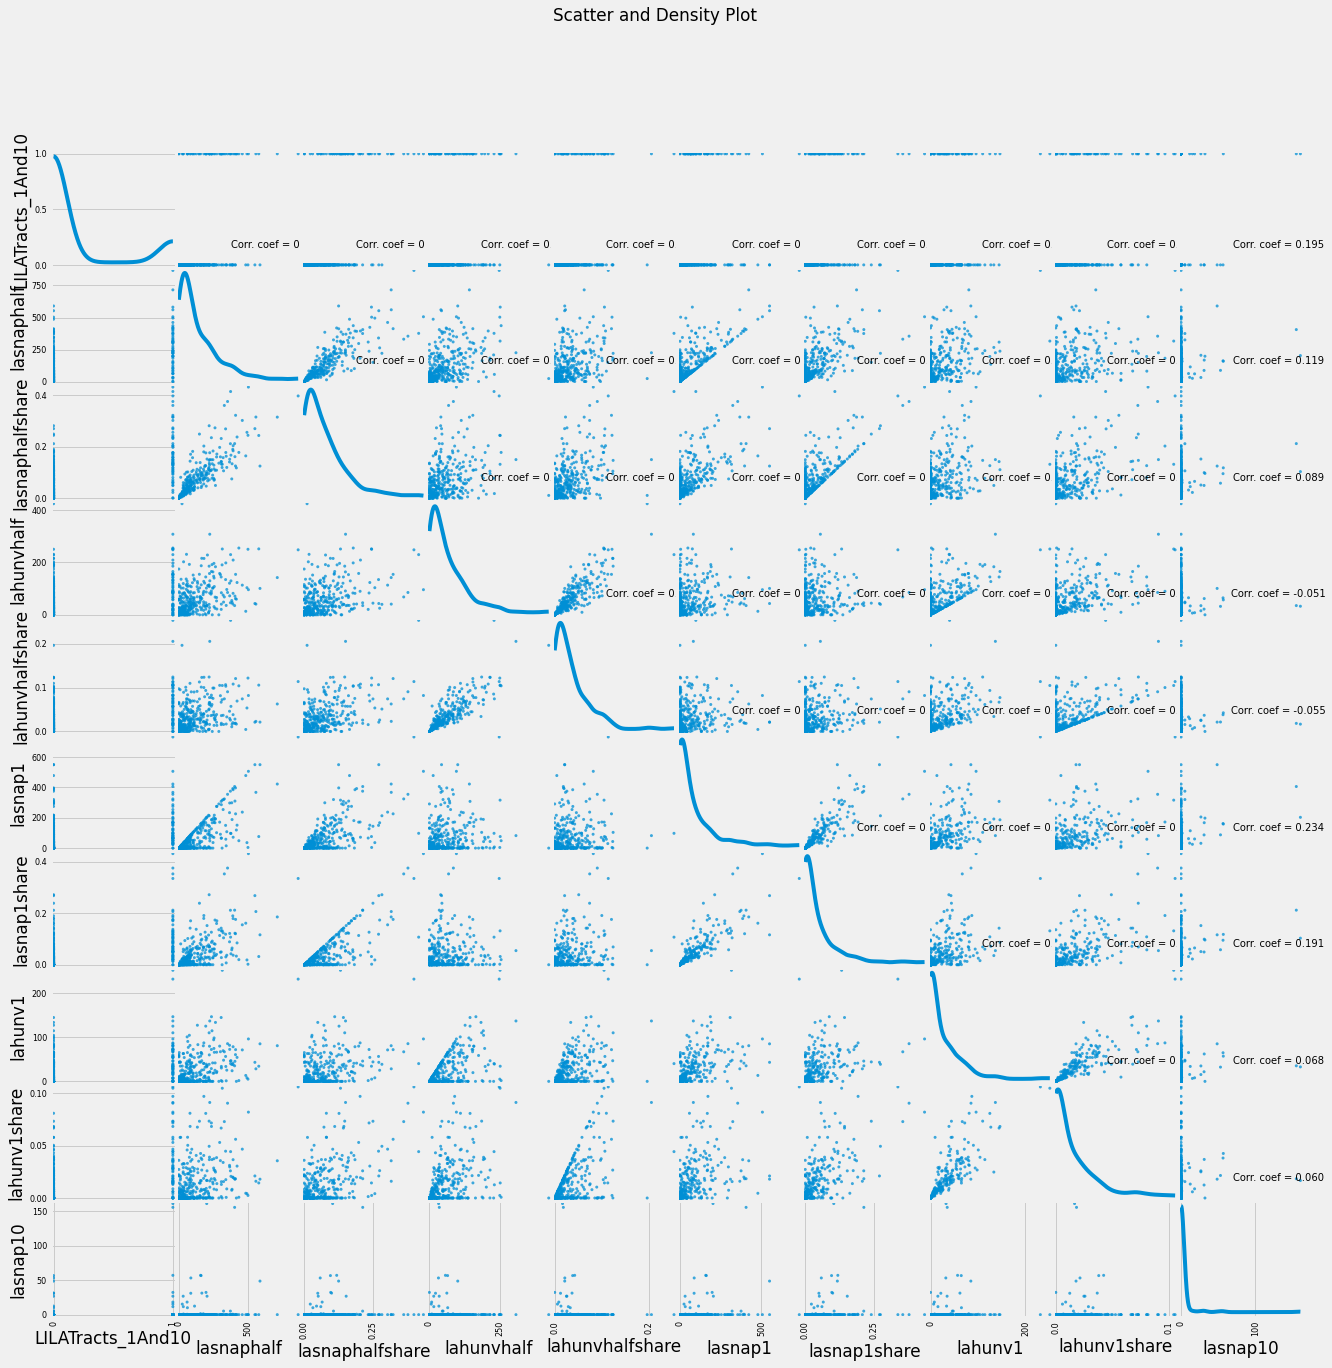

In [32]:
plotScatterMatrix(food_desert_df, 20, 10)

In [33]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = food_desert_df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

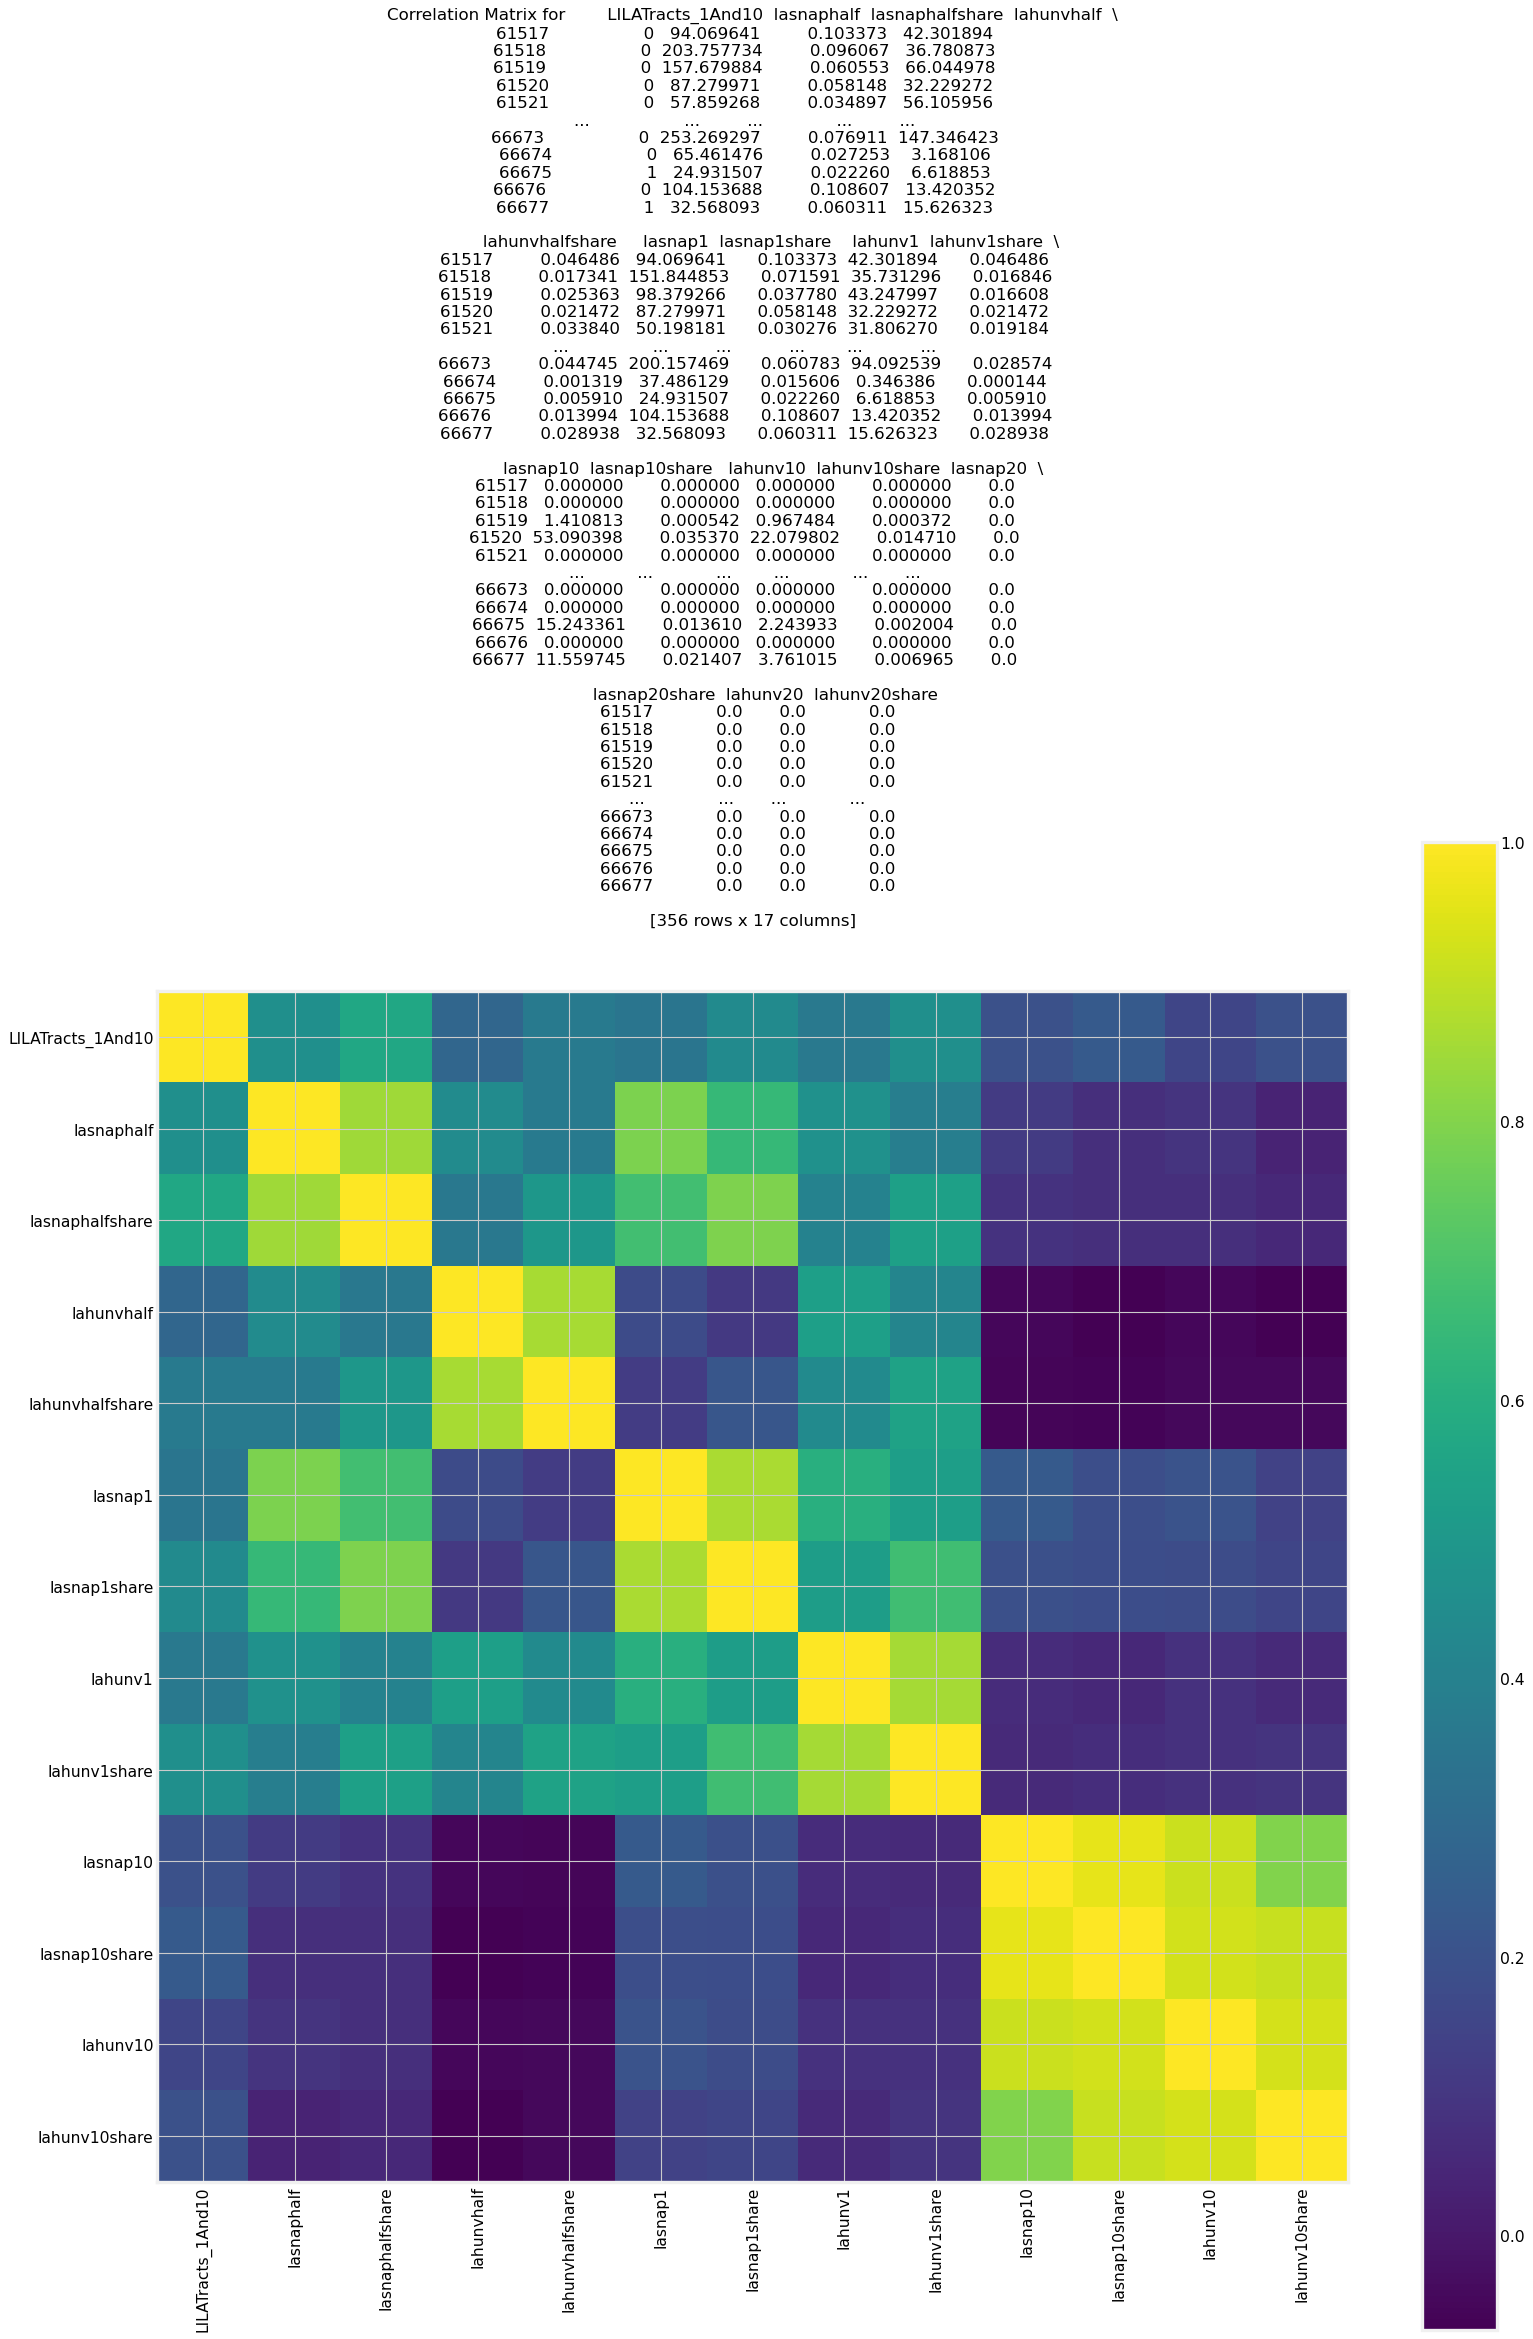

In [34]:
plotCorrelationMatrix(food_desert_df, 24)